## Evasive PDF Samples
The purpose of this project is to analyze a specific given dataset and through data analysis and Machine Learning applications find the malicious pdfs.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

### Importing the Dataset
This dataset is a collection of evasive PDF samples, labeled as malicious (1) or benign (0). The dataset contains 500,000 generated evasive samples, including 450,000 malicious and 50,000 benign PDFs.

In [2]:
df = pd.read_csv('Evasive-PDF-Samples.csv')

In [3]:
df.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,715.926,68,0,0,759,667,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,707.102,70,10,2,388,373,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1


### Data Cleaning
Through data cleaning we detect and correct errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability.
1. Handle Missing Values: it seems that in the dataset that was given there are not any missing values so this step can be skiped

In [4]:
print(df.isnull().sum())

pdfsize             0
pages               0
title characters    0
images              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
ObjStm              0
JS                  0
OBS_JS              0
Javascript          0
OBS_Javascript      0
OpenAction          0
OBS_OpenAction      0
Acroform            0
OBS_Acroform        0
class               0
dtype: int64


2. Remove Duplicates: It seems that the dataset has some dublicates so they are going to be droped.

In [5]:
print(len(df))
df=df.drop_duplicates()
print(len(df))

500000
498318


### Exploratory Data Analysis (EDA)
We are going to visualize our data through two different plot methods in order to understand the distribution and relationships between variables.
1. Histograms

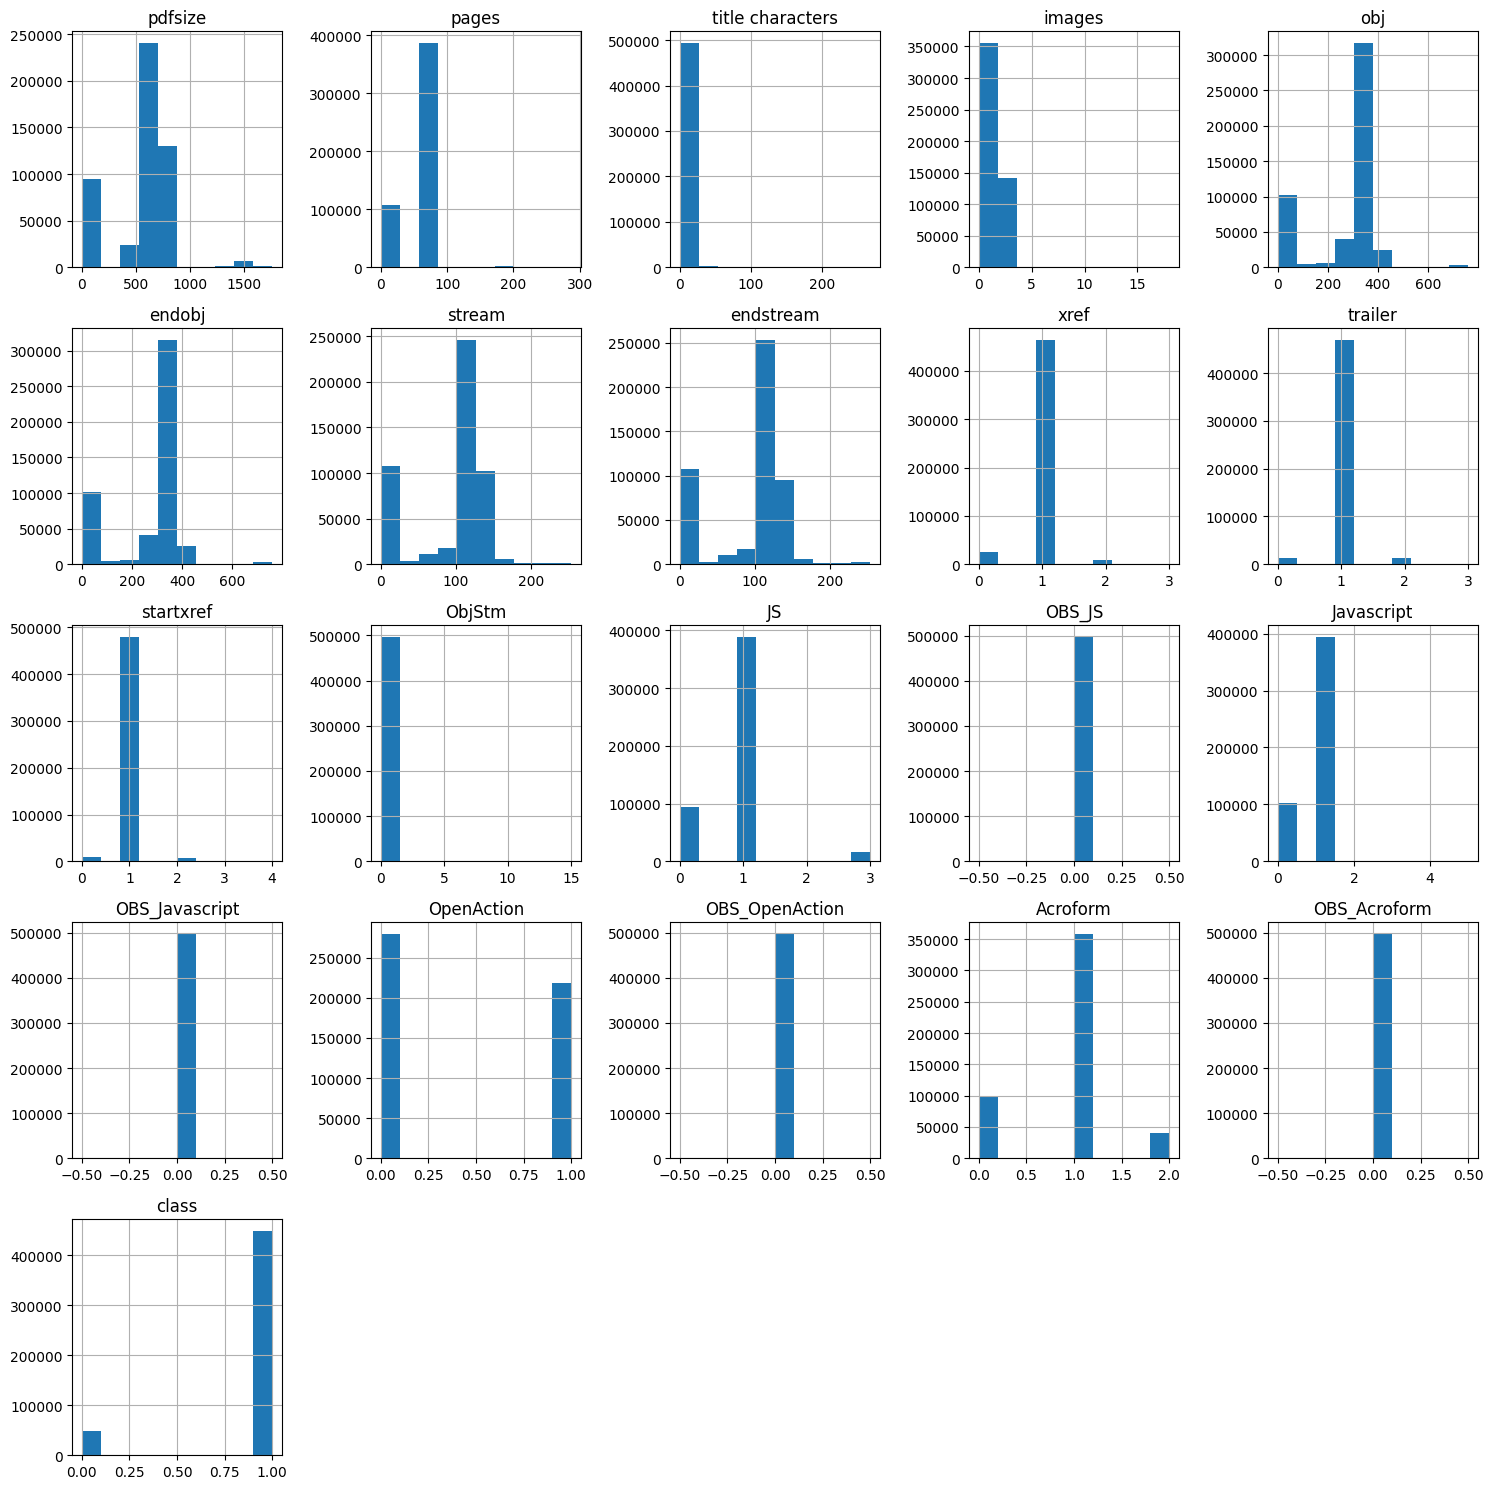

In [6]:
# Plot histograms for each numerical column
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

2. Scatter plots  //this is wrong idk what exactly to do

IndexError: index 24 is out of bounds for axis 0 with size 24

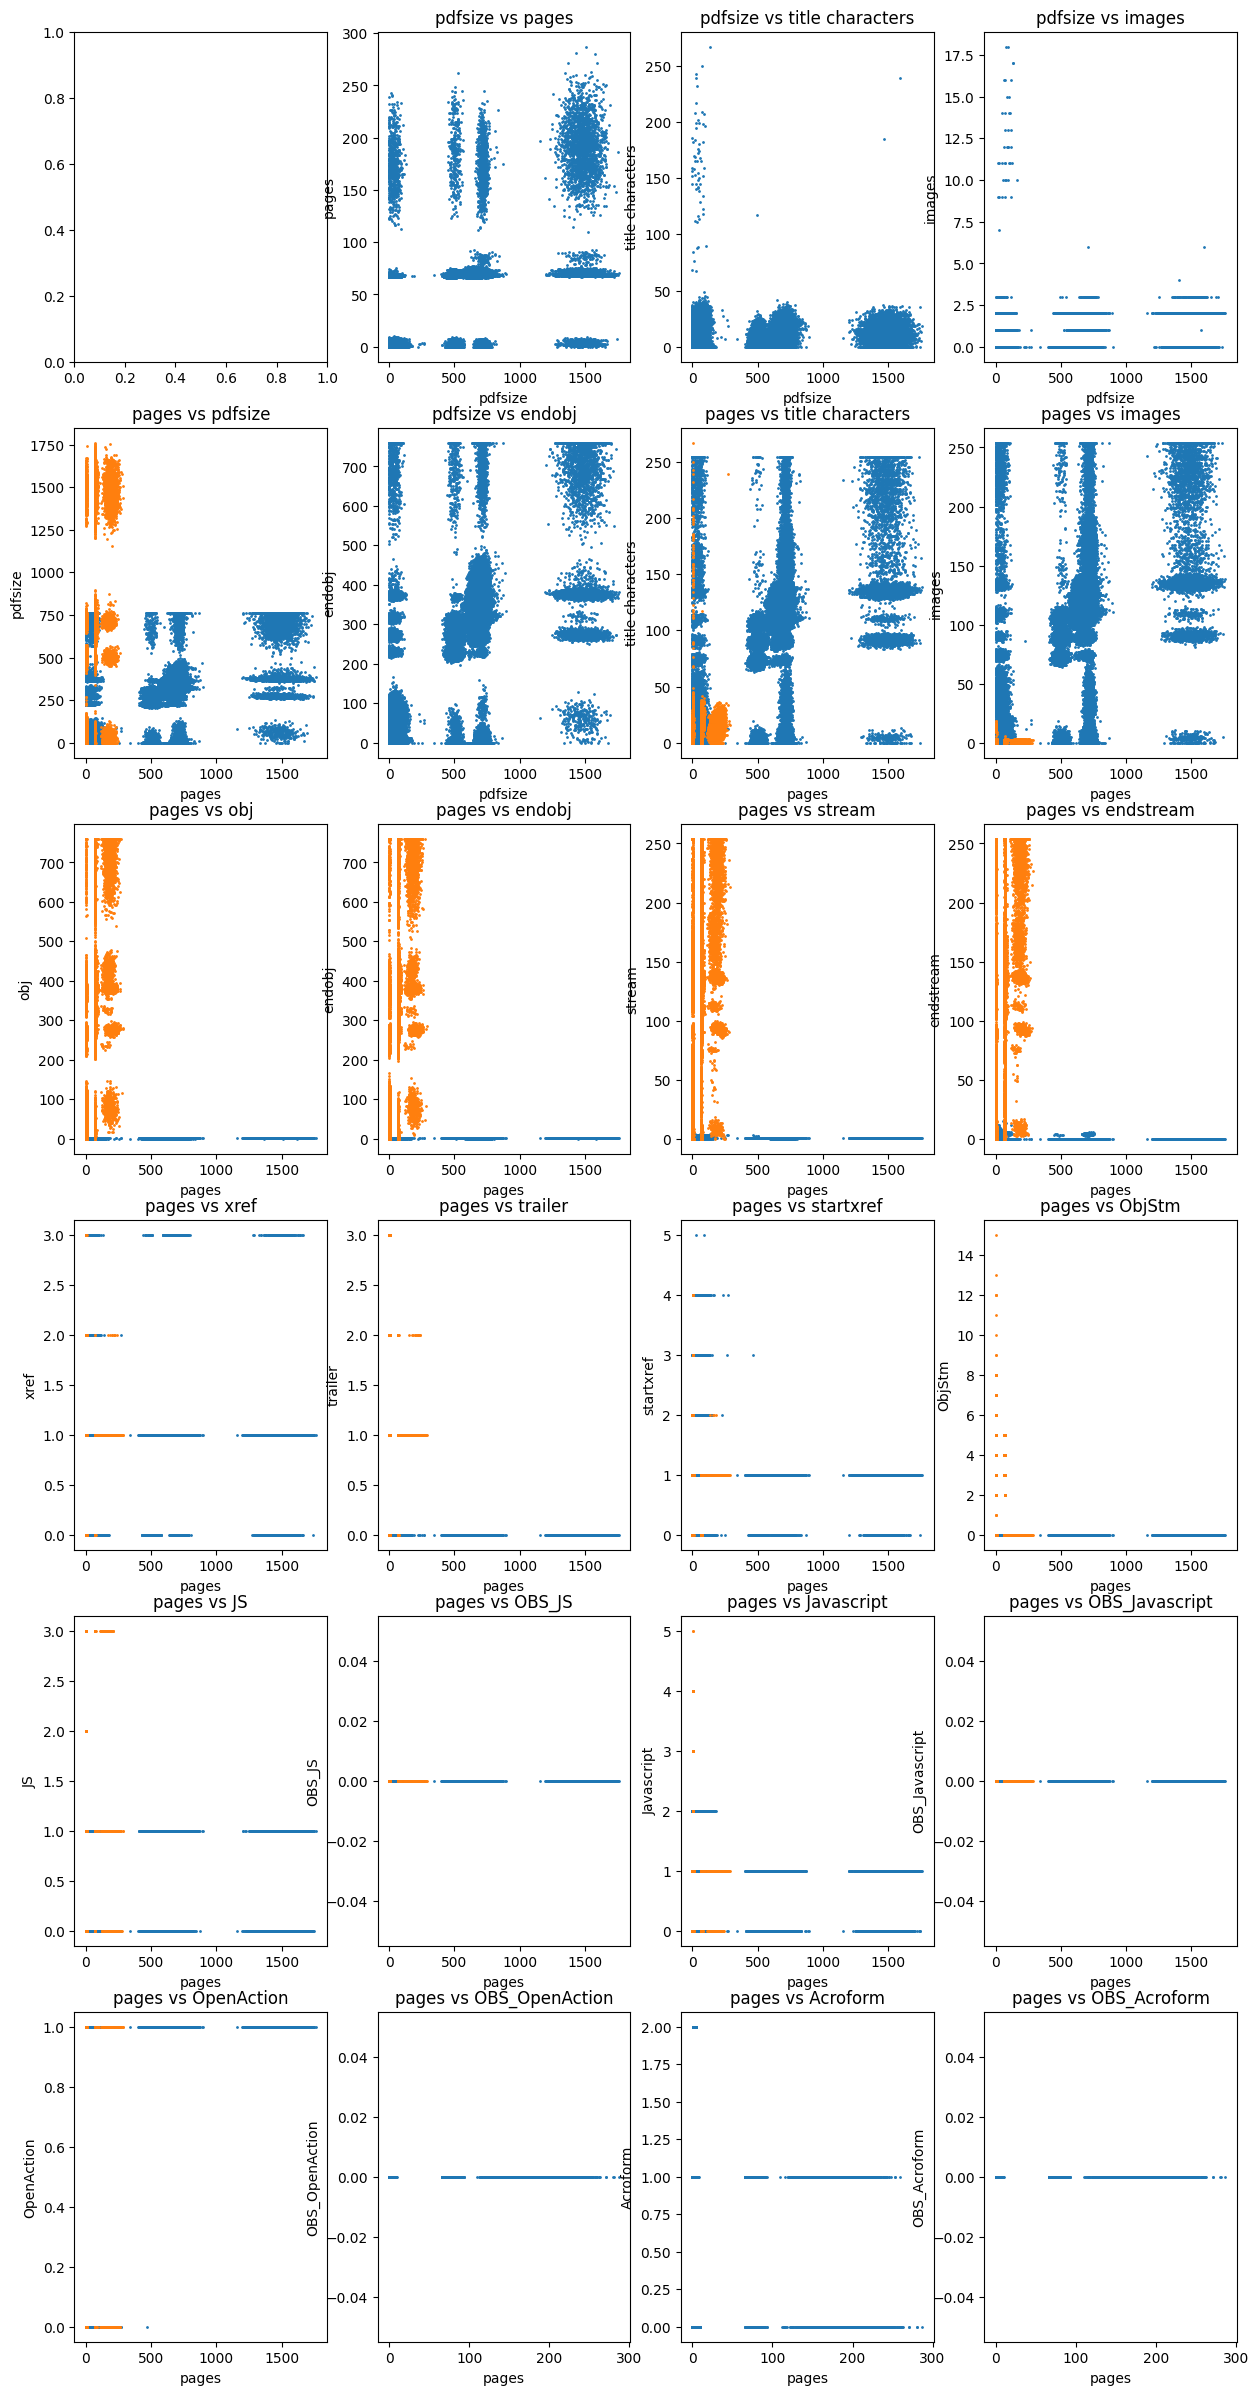

In [7]:
features = ['pdfsize', 'pages', 'title characters', 'images', 'obj', 'endobj','stream', 'endstream', 'xref', 
            'trailer', 'startxref', 'ObjStm', 'JS', 'OBS_JS', 'Javascript', 'OBS_Javascript', 'OpenAction', 'OBS_OpenAction',
            'Acroform', 'OBS_Acroform', 'class']

# Set the number of rows and columns for subplots
num_features = len(features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axs if it's not already flat
if num_rows == 1:
    axs = axs.reshape(1, -1)
else:
    axs = axs.flatten()

# Iterate over combinations of features and create scatter plots
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i != j:
            axs[i*num_cols + j].scatter(df[feature1], df[feature2], s= 1)
            axs[i*num_cols + j].set_xlabel(feature1)
            axs[i*num_cols + j].set_ylabel(feature2)
            axs[i*num_cols + j].set_title(f'{feature1} vs {feature2}')

# Hide any unused subplots
for i in range(num_features * num_cols, num_rows * num_cols):
    if i < num_rows * num_cols:
        axs[i].axis('off')

plt.tight_layout()
plt.show()

3. Correlation Matrix: used to understand the relationships between the variables of the dataset
#not sure??

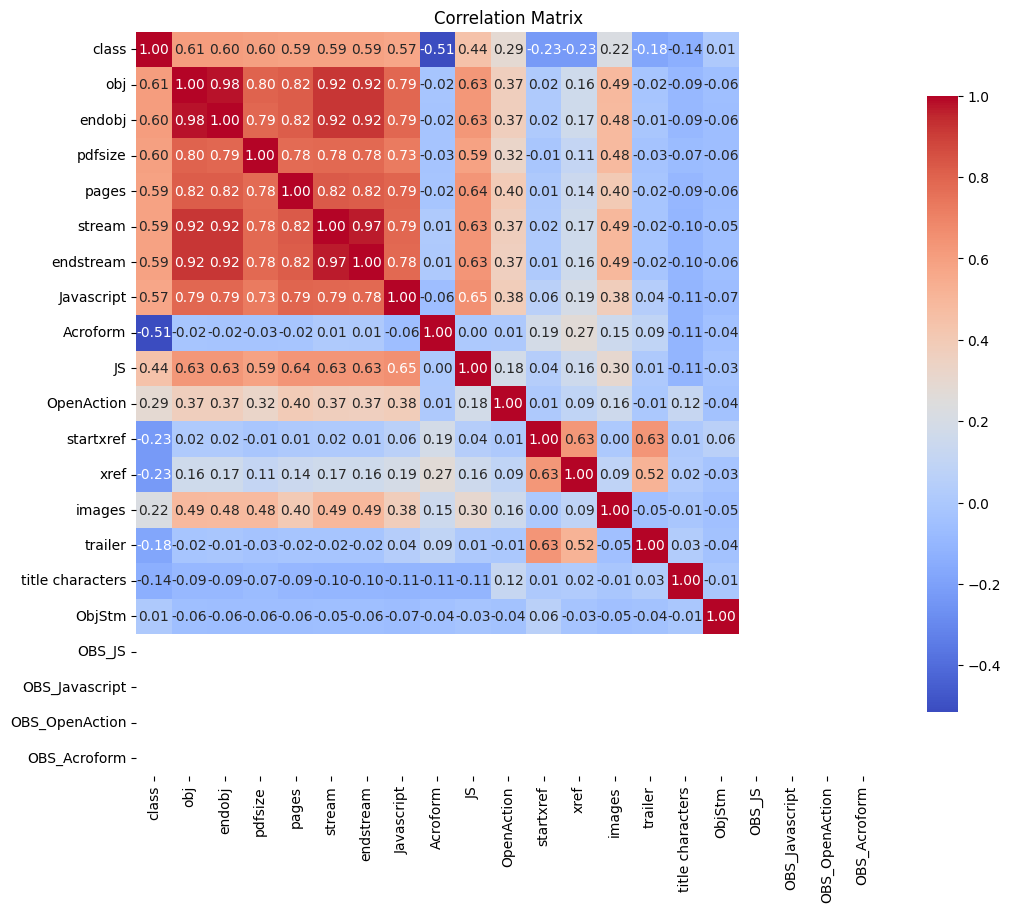

In [13]:

# Calculate the correlation matrix
corr = df.corr()

# Sort the correlation matrix based on the absolute correlation with the target variable
sorted_corr = corr['class'].abs().sort_values(ascending=False)

# Extract the corresponding features
sorted_features = sorted_corr.index

# Reorder the correlation matrix
corr = corr.loc[sorted_features, sorted_features]

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with a color map
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, 
            square=True, cbar_kws={"shrink": 0.8})

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

### Feature Engineering
1. PDF size vs Pages: It is noticeable that in the below scatter plot that all the non-malicious pdfs are below 500 pdf size and below 20 pages.

2. Data encoding: converting the variables into numerical representations .

In [ ]:
#One-hot Encoding
one_hot_encoded_features = pd.get_dummies(df[features],drop_first=True)
encoded_data1 = pd.concat([df.drop(columns=features), one_hot_encoded_features], axis=1)
encoded_data1.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,95323,15,0,1,284,294,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,98851,13,0,1,284,288,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,142668,13,0,1,289,296,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,161276,13,0,0,641,579,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,152714,15,10,2,324,316,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1


In [ ]:
#Label Encoding
label_encoder = LabelEncoder()
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the encoded dataset
df.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,95323,15,0,1,284,294,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,98851,13,0,1,284,288,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,142668,13,0,1,289,296,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,161276,13,0,0,641,579,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,152714,15,10,2,324,316,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1


3. Scale numerical features: scale the features to have similar ranges.

In [ ]:
# Apply standardization
scaler_standardization = StandardScaler()
df[features] = scaler_standardization.fit_transform(df[features])

# Apply normalization
scaler_normalization = MinMaxScaler()
df[features] = scaler_normalization.fit_transform(df[features])

# Display the scaled dataset
df.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,0.365878,0.243902,0.000000,0.055556,0.457895,0.461842,0.503937,0.503937,0.333333,0.333333,...,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0,1.0
1,0.367992,0.236934,0.000000,0.055556,0.457895,0.453947,0.488189,0.488189,0.333333,0.333333,...,0.0,0.333333,0.0,0.2,0.0,0.0,0.0,0.5,0.0,1.0
2,0.395508,0.236934,0.000000,0.055556,0.464474,0.464474,0.503937,0.492126,0.333333,0.333333,...,0.0,0.333333,0.0,0.2,0.0,0.0,0.0,0.5,0.0,1.0
3,0.406535,0.236934,0.000000,0.000000,0.998684,0.877632,0.984252,0.755906,0.333333,0.333333,...,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0,1.0
4,0.401525,0.243902,0.037453,0.111111,0.510526,0.490789,0.555118,0.543307,0.333333,0.333333,...,0.0,0.333333,0.0,0.2,0.0,1.0,0.0,0.5,0.0,1.0


### Splitting the Dataset
into training, validation, and test sets to evaluate the machine learning model.  The training set is used to train the model, while the validation set helps in tuning model parameters and selecting the best configuration, the test set provides an evaluation of the model's performance on unseen data.

In [ ]:

# Assuming 'data' contains your entire dataset, including features and target variable
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Split the dataset into training and temporary set (80% training and 20% temporary set)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation and 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (398654, 20)
Validation set shape: (49832, 20)
Test set shape: (49832, 20)


### Feature Selection: 
We are going to select the most relevant features that contribute the most predicting the target variable (class) using the correlation matrix method.

### Model Training


Text(0, 0.5, 'pages')

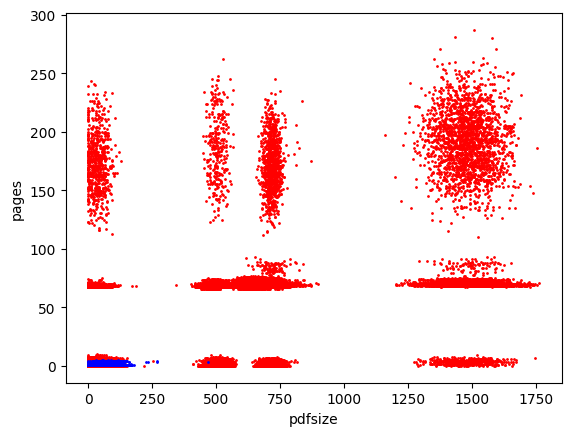

In [ ]:
_df = df[df['class'] == 1]
plt.scatter(_df['pdfsize'], _df['pages'], c='red')
_df = df[df['class'] == 0]
plt.scatter(_df['pdfsize'], _df['pages'], c='blue')
plt.xlabel('pdfsize')
plt.ylabel('pages')

In [ ]:
df['class']

0         1
1         1
2         1
3         1
4         1
         ..
499994    0
499995    0
499996    0
499998    0
499999    0
Name: class, Length: 498318, dtype: int64

In [ ]:
model = LinearRegression()
model.fit(df.drop('class', axis=1), df['class'])
model.coef_

array([ 2.15637613e-04,  9.93021094e-04, -6.09778547e-03, -8.76343204e-03,
        2.20094088e-04,  4.64165072e-05,  7.00946174e-04,  2.10009778e-04,
       -2.05255073e-01, -5.51941628e-03, -5.08339658e-02,  4.38736352e-02,
        2.25702204e-02,  2.08166817e-17,  4.41157921e-02,  0.00000000e+00,
        5.35283219e-02,  0.00000000e+00, -2.62443095e-01,  0.00000000e+00])

In [ ]:
df['pred'] = model.predict(df.drop('class', axis=1)) > 0.5
df['pred']

0          True
1          True
2          True
3          True
4          True
          ...  
499994    False
499995    False
499996    False
499998    False
499999    False
Name: pred, Length: 498318, dtype: bool

In [ ]:
accuracy_score(df['class'], df['pred']), f1_score(df['class'], df['pred'])

(0.9826596671201924, 0.9904357749169591)

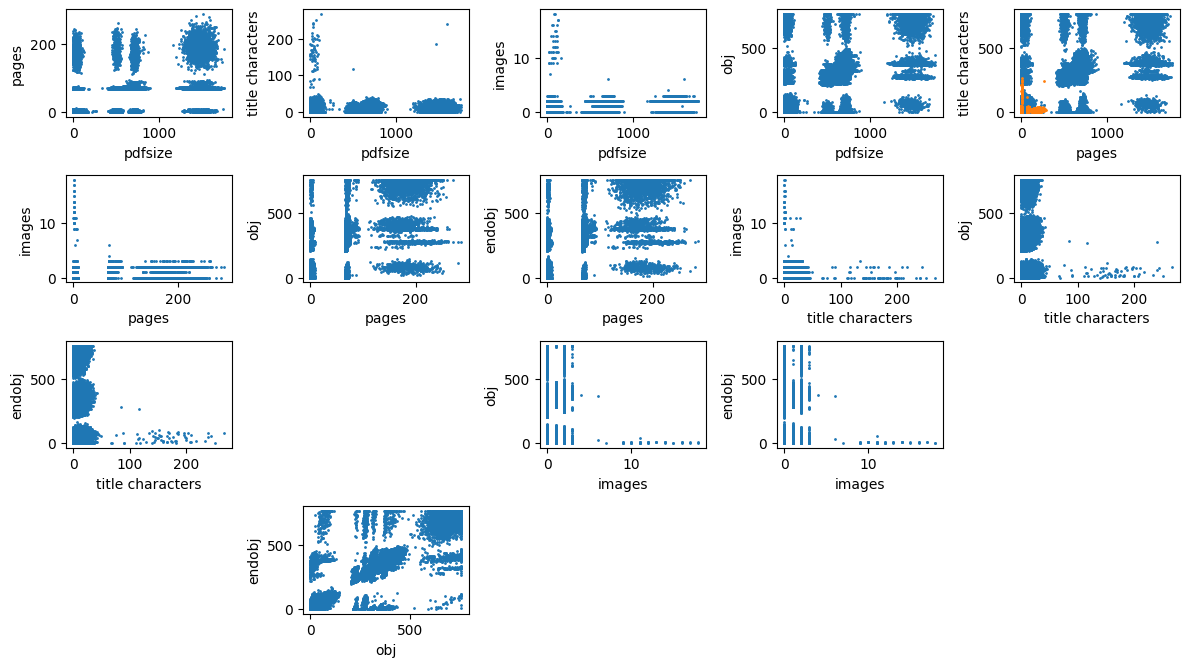

In [ ]:
features = ['pdfsize', 'pages', 'title characters', 'images', 'obj', 'endobj']

# Creating scatter plots
plt.figure(figsize=(12, 8))
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:
            plt.subplot(5, 5, i * 3 + j)
            plt.scatter(df[feature1], df[feature2], s= 1)
            plt.xlabel(feature1)
            plt.ylabel(feature2)

plt.tight_layout()
plt.show()